In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [65]:
img = cv2.imread("./screenshots/fsScreen_2022_10_21_14_00_24.png")
size = (1280, 720)
img = cv2.resize(img, size)
org_img = img
cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivity = 40
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
mask = cv2.inRange(hsv, lower_white, upper_white)
res = cv2.bitwise_and(img,img, mask= mask)

img = res
cv2.imshow('image',res)
cv2.waitKey()
cv2.destroyAllWindows()

In [75]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask,vertices,255)
    masked = cv2.bitwise_and(img, mask)
    return masked

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(img_gray,(kernel_size, kernel_size),0)
cv2.imshow('image',blur_gray)
cv2.waitKey()
cv2.destroyAllWindows()
low_threshold = 80
high_threshold = 265
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
#roi_vertices = vertices = np.array([[0,500],[10,300], [300,200], [500,200], [800,300], [800,500]], np.int32)
roi_vertices = np.array([[340,700],[340,300], [250,80], [530,80], [880,300], [880,700]], np.int32)
processed_img = roi(edges, [roi_vertices])

cv2.imshow('image',processed_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [86]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 50  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40  # minimum number of pixels making up a line
max_line_gap = 35  # maximum gap in pixels between connectable line segments
line_image = np.copy(org_img) # * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(processed_img, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
coordinates = []
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,255,0),5)
        coordinates += [(x1,y1)]
        coordinates += [(x2,y2)]
print(coordinates)
cv2.circle(line_image,(int(size[0]/2),int(size[1]/2)),5,(255,255,255),5)        
cv2.line(line_image,coordinates[1],coordinates[-2],(255,0,0),3)   
#lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
cv2.imshow('image',line_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[(575, 303), (585, 218), (531, 700), (536, 648), (544, 535), (549, 490), (527, 697), (533, 648), (547, 538), (556, 467), (566, 393), (571, 348), (562, 394), (568, 347)]


[575, 303, 585, 218, 531, 700, 536, 648, 544, 535, 549, 490, 527, 697, 533, 648, 547, 538, 556, 467, 566, 393, 571, 348, 562, 394, 568, 347]


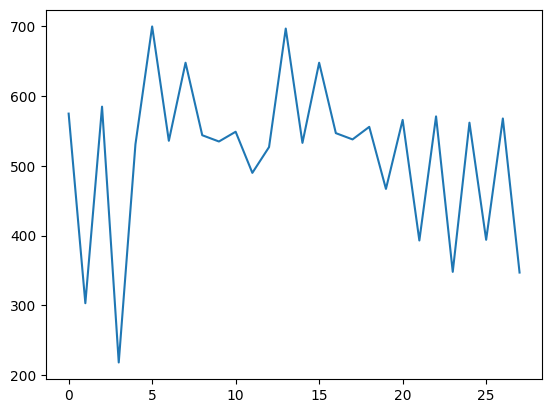

In [71]:
print(coordinates)
plt.plot(coordinates)